📱 Bob vs The Mobile Giants Bob just started his own mobile company to compete with big names like Apple and Samsung. But... Bob has no idea how to price his phones. 💸

So, he collected data from various mobile brands — features like RAM, storage, battery, camera, etc. Now he wants to predict the price range (not the exact price) of his phones — whether it's:

💰 Low Budget

💵 Mid Range

💎 High-End

👑 Luxury Beast

With your help (and some KNN magic 🧙‍♂️), Bob is ready to take on the tech giants. Let’s help him price it right!

Note: I have used and mentioned the dataset from Kaggle in this project. https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

https://miro.medium.com/v2/resize:fit:784/1*vppGqsrwph9Yq0Mk2S4bLw.jpeg

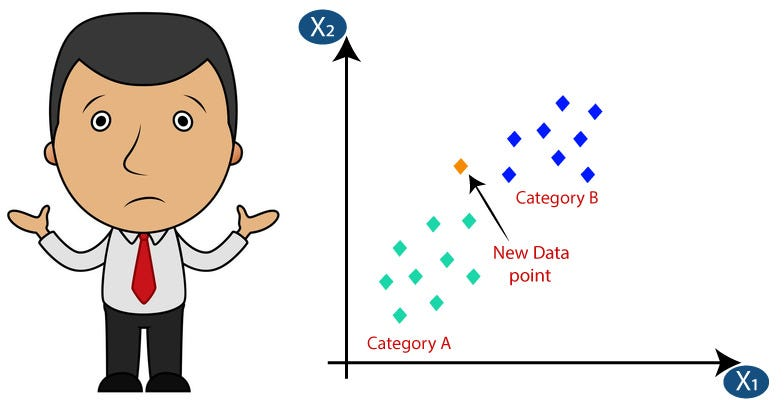

In [1]:
# 📦 Importing essential libraries

import pandas as pd                      # For data handling and manipulation
import numpy as np                       # For numerical operations
import matplotlib.pyplot as plt          # For basic plotting and visualizations
import seaborn as sns                    # For beautiful and informative plots

# 🧪 Machine Learning tools from scikit-learn

from sklearn.model_selection import train_test_split       # To split the data into training and testing sets
from sklearn.neighbors import KNeighborsClassifier         # KNN algorithm for classification
from sklearn.metrics import accuracy_score, classification_report  # To evaluate model performance


In [3]:
# 📥 Loading the datasets

test = pd.read_csv('/content/test.csv')    # This is the test dataset (used for predictions/evaluation)
train = pd.read_csv('/content/train.csv')  # This is the training dataset (used to train the KNN model)

In [4]:
#display the dataset
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [5]:
# 🔍 Checking all column names in the training dataset
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
# 🔍 Checking all column names in the testing dataset
test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [7]:
# ℹ️ Checking basic info about the training dataset

train.info()
# This shows:
# - Number of entries (rows)
# - Column names and their data types
# - Non-null counts for each column
# Helps identify missing values and understand the data structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
# 📊 Getting statistical summary of the training dataset
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
# 🎯 Selecting Features (X) and Target (y)

# X contains the input features used to predict the mobile price range
x = train[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
           'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
           'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
           'touch_screen', 'wifi']]

# y is the target variable — the price range of the mobile
y = train['price_range']

In [10]:
# ✂️ Splitting the data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)


# 80% of the data will be used for training, and 20% for testing
# random_state ensures reproducibility — same split every time

In [13]:
# 🤖 Creating a KNN model for Bob using 3 nearest neighbors

model = KNeighborsClassifier(3)

# This means the model will look at the 3 closest data points to decide the class of a new phone

In [14]:
# 🏋️‍♂️ Training Bob's KNN model on the training data
model.fit(x_train, y_train)

# The model learns how features like RAM, battery, etc., relate to price range


KNeighborsClassifier(n_neighbors=3)

In [16]:
# 🔮 Predicting price ranges on the test set

 model.predict(x_test)

# Bob's model is now making guesses about phone prices based on what it learned — no crystal ball needed!

In [17]:
# 📊 Evaluating the model's performance with a classification report

print(classification_report(y_test, output))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       104
           1       0.94      0.89      0.91       114
           2       0.92      0.91      0.92       105
           3       0.95      0.96      0.95        77

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.93      0.94      0.93       400



In [18]:
# ✅ Our model is ready! Now let’s prepare the test data for predictions

# Checking the columns in df2
test.columns

# 🧹 Removing the 'id' column — it's just an identifier, not useful for prediction
test.columns[:-1]


Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen'],
      dtype='object')

In [19]:
# 🧪 Checking if test features match training features (excluding 'id' and 'price_range')

test.columns[1:] == train.columns[:-1]

# test.columns[1:] → skips the 'id' column in test.csv
# train.columns[:-1] → skips the target column 'price_range' in train.csv

# ✅ This should return True if both datasets have the same feature columns


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [ ]:
'''🧠 Why this check is important:
python
Copy
Edit
test.columns[1:] == train.columns[:-1]
When training and testing a model like KNN, the model learns patterns from the training features (e.g., RAM, battery, etc.).
For the model to work correctly on new/unseen test data, the test data must:

✅ Have the same features as the training data

✅ Have the same column order

❌ Not contain extra or missing columns

⚠️ What can go wrong if they don’t match?
The model might throw an error.

The predictions could be inaccurate or totally wrong.

It may use the wrong columns for prediction, which is like asking about battery power but looking at RAM instead 😬

In [21]:
test.drop(columns='id',inplace=True)

# What does inplace=True do?
# 👉 It modifies the original 'test' DataFrame directly.
# 👉 So there's no need to write: test = test.drop(columns='id')

In [23]:
test
#🧾 What you’ll see:
#After dropping the id column, running test will show:

#All feature columns like battery_power, ram, int_memory, etc.

#✅ No "id" column

#✅ Ready to be passed into your trained KNN model for prediction

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [26]:
# Let's see what price range each phone belongs to 💸

outputs = model.predict(test)

In [28]:
# 📊 Adding the predictions to the test data!
# Now Bob's phones finally have a price range 😎📱💸

test['Predicted price'] = outputs


In [29]:
# 💾 Saving Bob’s prediction-loaded dataset to a CSV file!
# The file is called "complete.csv" and includes all predicted price ranges 🎯

test.to_csv("complete.csv")
